In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

# Import preproceesing algorithm
from sklearn.model_selection import train_test_split

# Import classification algorithms
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation algorithms
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc


# Functions

In [2]:
def classification_assessment(model, model_name, X_test, y_test):
    """
    Evaluate the performance of a classification model and return results as a dictionary entry.

    Parameters:
    - model: Trained classification model.
    - model_name: Name of the model as a string.
    - X_test: Test features.
    - y_test: True labels for the test set.

    Returns:
    - results: A dictionary with the model name as the key and evaluation metrics as the value.
    """
    # Predict class labels
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_pred, y_test)

    # Get probabilities for precision-recall and ROC curves
    probs = model.predict_proba(X_test)[:, 1]

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, probs)
    prec_rec_auc = auc(recall, precision)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Dictionary entry for the model
    results = {
        model_name: {
            "accuracy": accuracy,
            "precision_recall_auc": prec_rec_auc,
            "roc_auc": roc_auc,
            "fpr_tpr": (fpr, tpr),
            "precision_recall": (precision, recall),
        }
    }
    return results



In [3]:


def tuned_random_forest_model(X_train, y_train, X_test, y_test):
    param_grid = {
    # 'n_estimators': [50, 100],
    'n_estimators': [50],
    # 'max_depth': [None, 10, 20, 30],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
    }

    best_model = None
    best_score = 0

    for params in itertools.product(*param_grid.values()):

        # Create a dictionary of parameters for this iteration
        param_dict = dict(zip(param_grid.keys(), params))

        model = RandomForestClassifier(**param_dict)  # Unpack the dictionary
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_model = model

    return best_model

In [4]:
def tuned_svm_model(X_train, y_train, X_test, y_test):
    param_grid = {
    # 'C': [0.1, 1, 10],
    # 'gamma': [1, 0.1, 0.01],
    # 'kernel': ['linear','rbf', 'poly', 'sigmoid']
    }

    best_model = None
    best_score = 0

    for params in itertools.product(*param_grid.values()):

        # Create a dictionary of parameters for this iteration
        param_dict = dict(zip(param_grid.keys(), params))

        model = SVC(probability=True,**param_dict)  # Unpack the dictionary
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_model = model

    return best_model

In [5]:
def tuned_knn_model(X_train, y_train, X_test, y_test):
    param_grid = {
    # 'n_neighbors': [5, 10, 15],
    # 'weights': ['uniform', 'distance'],
    # 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    }

    best_model = None
    best_score = 0

    for params in itertools.product(*param_grid.values()):

        # Create a dictionary of parameters for this iteration
        param_dict = dict(zip(param_grid.keys(), params))

        model = KNeighborsClassifier(**param_dict)  # Unpack the dictionary
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_model = model

    return best_model

# Exploratory Analysis

In [6]:
url = "https://raw.githubusercontent.com/giovanni-lucarelli/basket/main/data/games_processed.csv"
df = pd.read_csv(url)

KeyboardInterrupt: 

In [ ]:
df.describe()

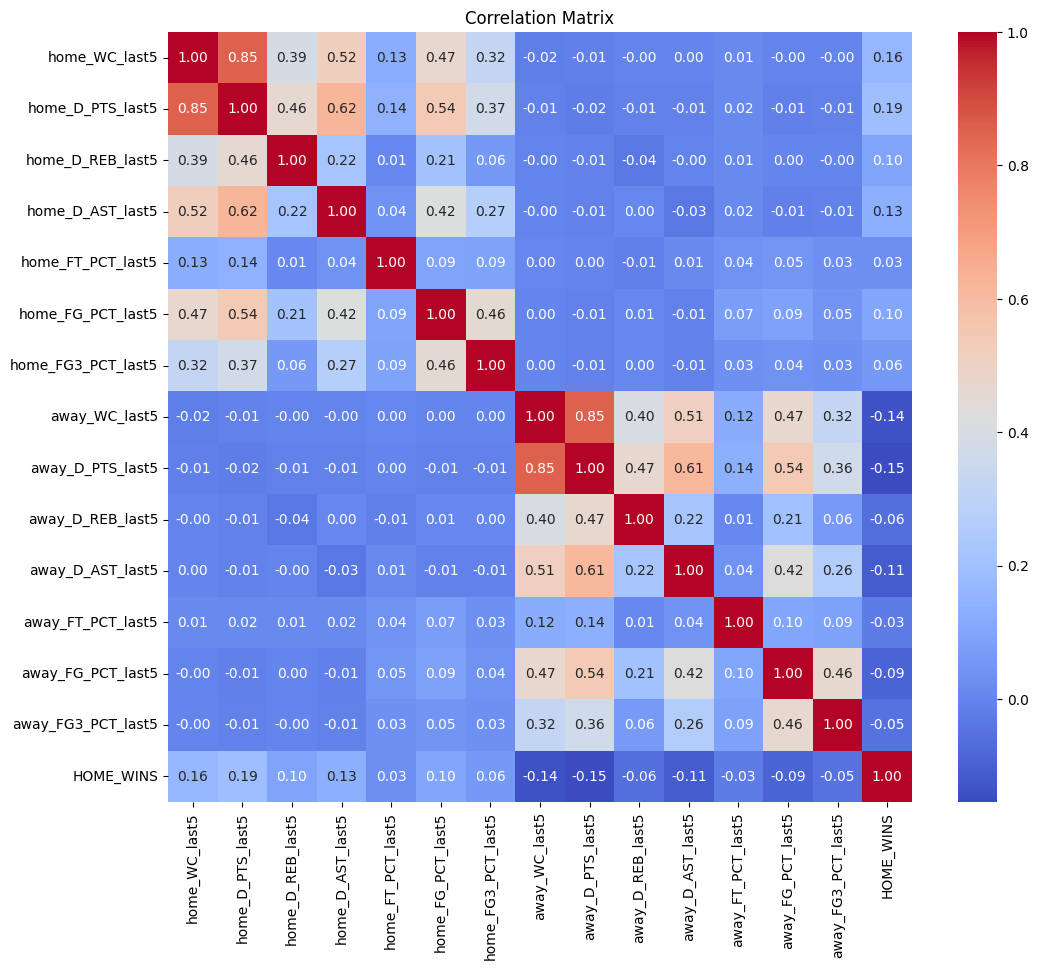

In [ ]:
# Remove the last column
df_corr = df.iloc[:, :-1]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Remark:** by definition it is a block matrix and the two blocks are (almost) identical as expected.

In [ ]:
# imbalance ratio

ir = max(df['HOME_WINS'].value_counts())/min(df['HOME_WINS'].value_counts())
ir

1.4333179935572942

# Train and Test on 2022

In [ ]:
X_test = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) >= 2022]
# percentage test set
# print(len(X_test)/len(df)*100)


X_train = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) < 2022]
y_train = X_train['HOME_WINS']
X_train = X_train.drop(columns=['HOME_WINS','GAME_DATE_EST'])

X_test = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) >= 2022]
y_test = X_test['HOME_WINS']
X_test = X_test.drop(columns=['HOME_WINS','GAME_DATE_EST'])

In [33]:
# best_svm = tuned_svm_model(X_train, y_train, X_test, y_test)

# classification_assessment(best_svm, X_test, y_test)

In [34]:
# new version using the functions

best_rf = tuned_random_forest_model(X_train, y_train, X_test, y_test)

rf_metrics = classification_assessment(best_rf, 'RF', X_test, y_test)


In [35]:
best_knn = tuned_knn_model(X_train, y_train, X_test, y_test)

knn_metrics = classification_assessment(best_knn, 'KNN', X_test, y_test)

In [36]:
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)

dummy_metrics = classification_assessment(dummy_classifier, 'dummy', X_test, y_test)

In [37]:
nb_classifier = BernoulliNB()

# Fit the model
nb_classifier.fit(X_train, y_train)

nb_metrics = classification_assessment(nb_classifier, 'NB', X_test, y_test)

In [ ]:
# build a dictionary with all the metrics to iterate over
all_metrics = {}
all_metrics.update(rf_metrics)
all_metrics.update(knn_metrics)
all_metrics.update(dummy_metrics)
all_metrics.update(nb_metrics)

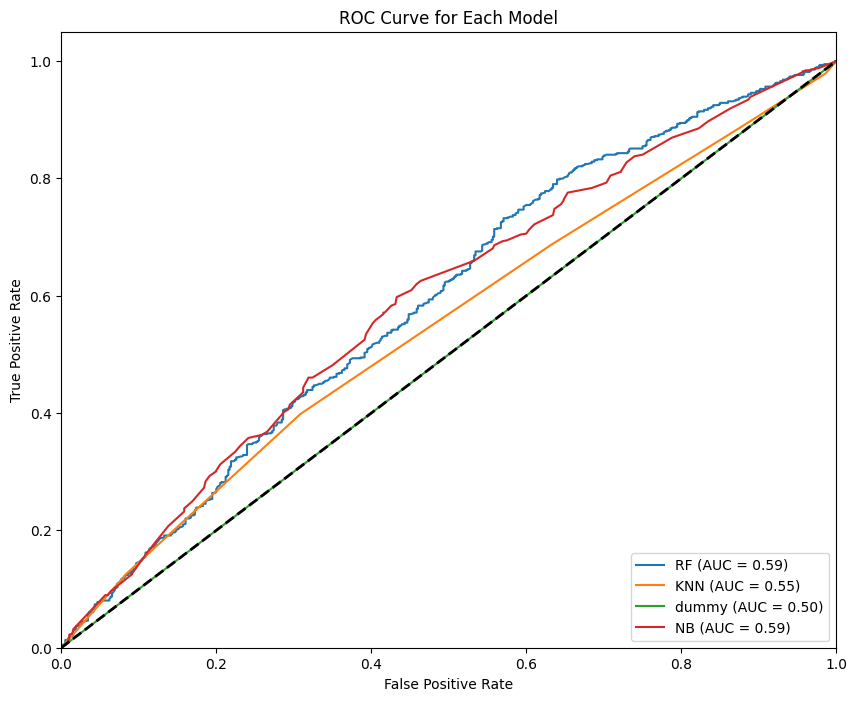

In [44]:
plt.figure(figsize=(10, 8))

for model_name, metrics in all_metrics.items():
    fpr, tpr = metrics['fpr_tpr']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Model')
plt.legend(loc='lower right')
plt.show()

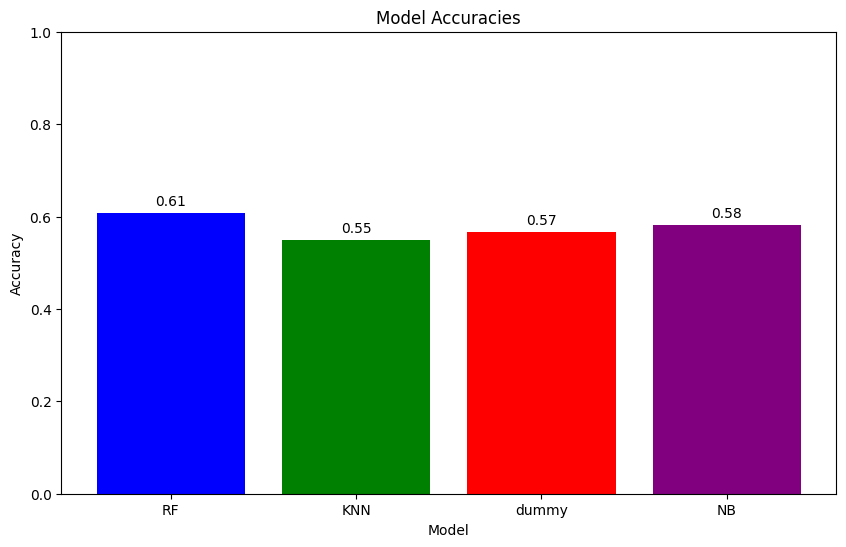

In [43]:
# Extract accuracies from the metrics
accuracies = {model: metrics['accuracy'] for model, metrics in all_metrics.items()}

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
# Add the accuracy values on top of each bar
for i, (model, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.show()



Save all the metrics on a file, to make future plots without running everytime

In [10]:
import json

# Save the all_metrics dictionary to a JSON file
with open('all_metrics.json', 'w') as f:
    json.dump(all_metrics, f, indent=4)

NameError: name 'all_metrics' is not defined

In [48]:
# Extract the required metrics
metrics_to_save = {model: {metric: values[metric] for metric in ["accuracy", "precision_recall_auc", "roc_auc"]} for model, values in all_metrics.items()}

# Save to a text file
with open('model_metrics.txt', 'w') as f:
    for model, metrics in metrics_to_save.items():
        f.write(f"Model: {model}\n")
        for metric, value in metrics.items():
            f.write(f"{metric}: {value}\n")
        f.write("\n")

# Model Assessment on Previous Years

In [ ]:
# # List of models
# models = [
#     RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20)
#     # BernoulliNB(),
#     # DummyClassifier(),
#     # KNeighborsClassifier(n_neighbors=60, weights='distance'),
#     # SVC(probability=True)
# ]

# century_metrics = {}

# # Loop through models
# for model in models:
    
#     target_years = df['GAME_DATE_EST'].str.split('-').str[0].astype(int)

#     for year in range(min(target_years) + 1, max(target_years) + 1):
        
#         # Get the model's name and add year
#         model_name = type(model).__name__ + str(year) 

#         # Rolling origin forecasting (for validation)
#         X_train = df[target_years < year]
#         y_train = X_train['HOME_WINS']
#         X_train = X_train.drop(columns=['HOME_WINS', 'GAME_DATE_EST'])

#         # Only test on `year`
#         X_test = df[target_years == year]
#         y_test = X_test['HOME_WINS']
#         X_test = X_test.drop(columns=['HOME_WINS', 'GAME_DATE_EST'])

#         # Train the model
#         model.fit(X_train, y_train)

#         # Test the model
#         y_pred = model.predict(X_test)

#         century_metrics[model_name] = classification_assessment(model, model_name, X_test, y_test)
#         classification_assessment(model, model_name, X_test, y_test)

#         print(f"{model_name} - Training in year {year}")

RandomForestClassifier2004 - Training in year 2004
RandomForestClassifier2005 - Training in year 2005
RandomForestClassifier2006 - Training in year 2006
RandomForestClassifier2007 - Training in year 2007
RandomForestClassifier2008 - Training in year 2008
RandomForestClassifier2009 - Training in year 2009
RandomForestClassifier2010 - Training in year 2010


KeyboardInterrupt: 

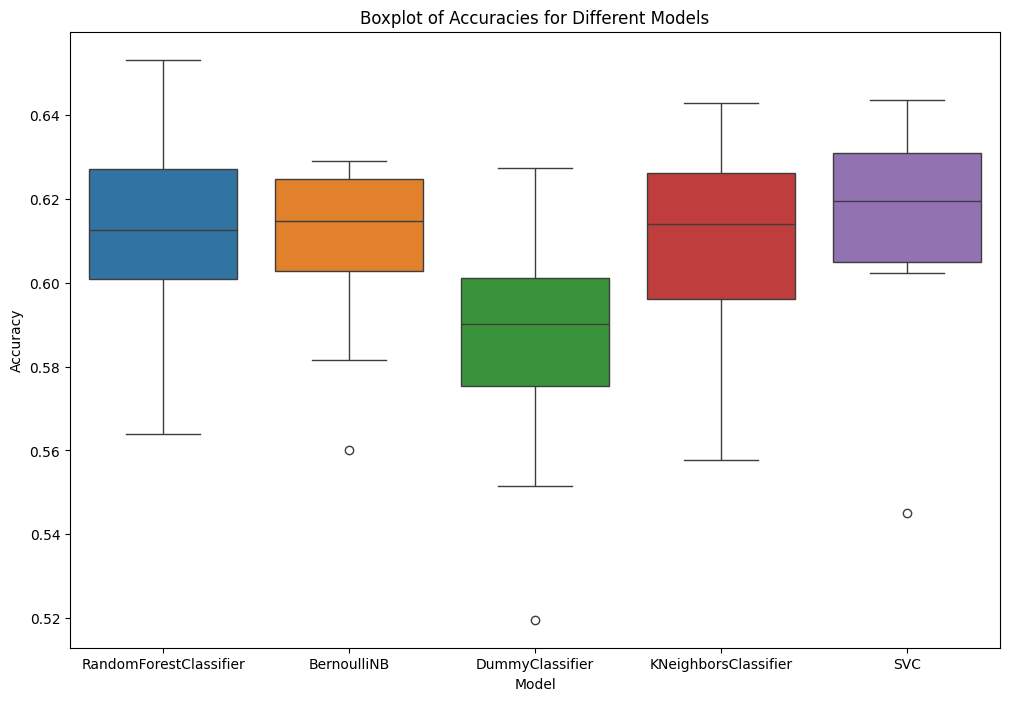

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=pd.DataFrame(model_accuracies))
# plt.title('Boxplot of Accuracies for Different Models')
# plt.ylabel('Accuracy')
# plt.xlabel('Model')
# plt.show()

In [ ]:
'''
TODO:

1. Statistical significance testing to see which is the best learning
technique. Under normality assumption we can do a t-test for the mean value
of the 5 accuracies vectors.

2. Use different metric to compare the learning techniques such as roc-auc (?)
'''